You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

Answer:

In [ ]:
!pip install pandas matplotlib seaborn

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('diabetes.csv')

In [13]:
# Display the first few rows of the dataset
print(df.head())

# Get statistical summary of the variables
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

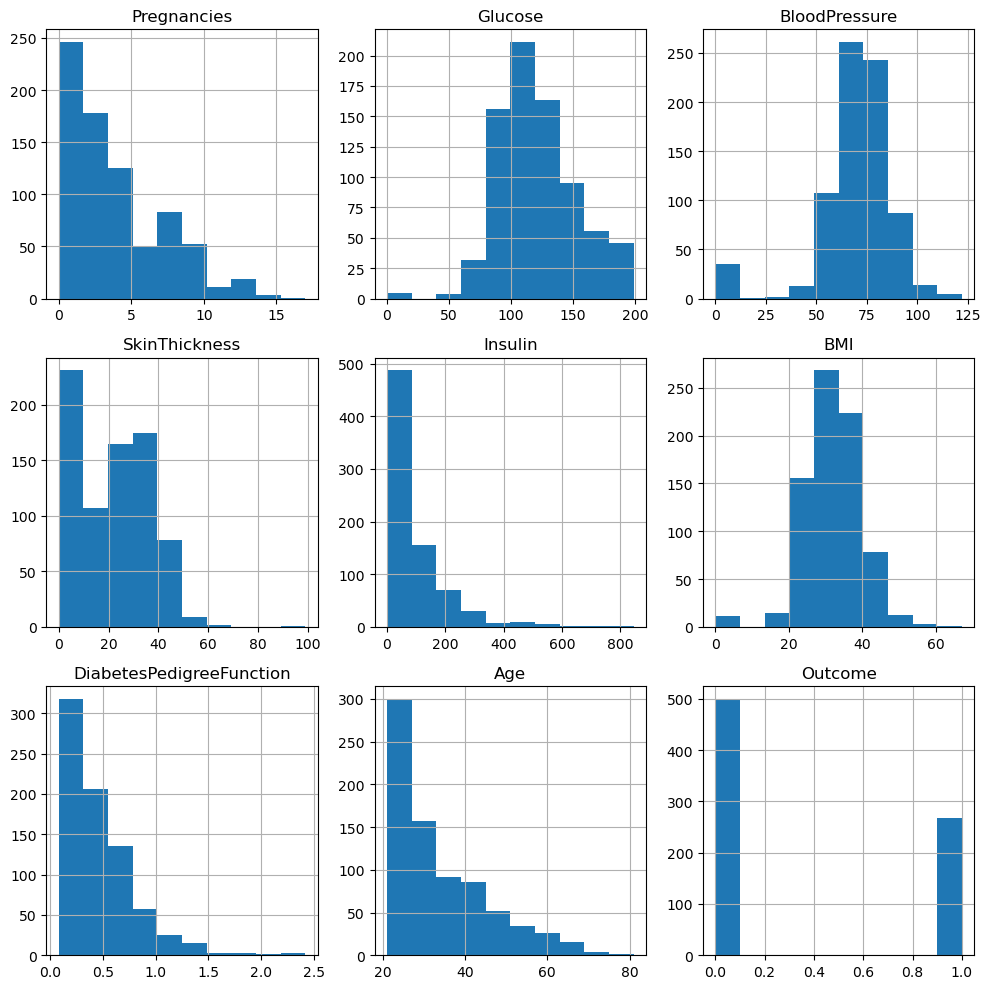

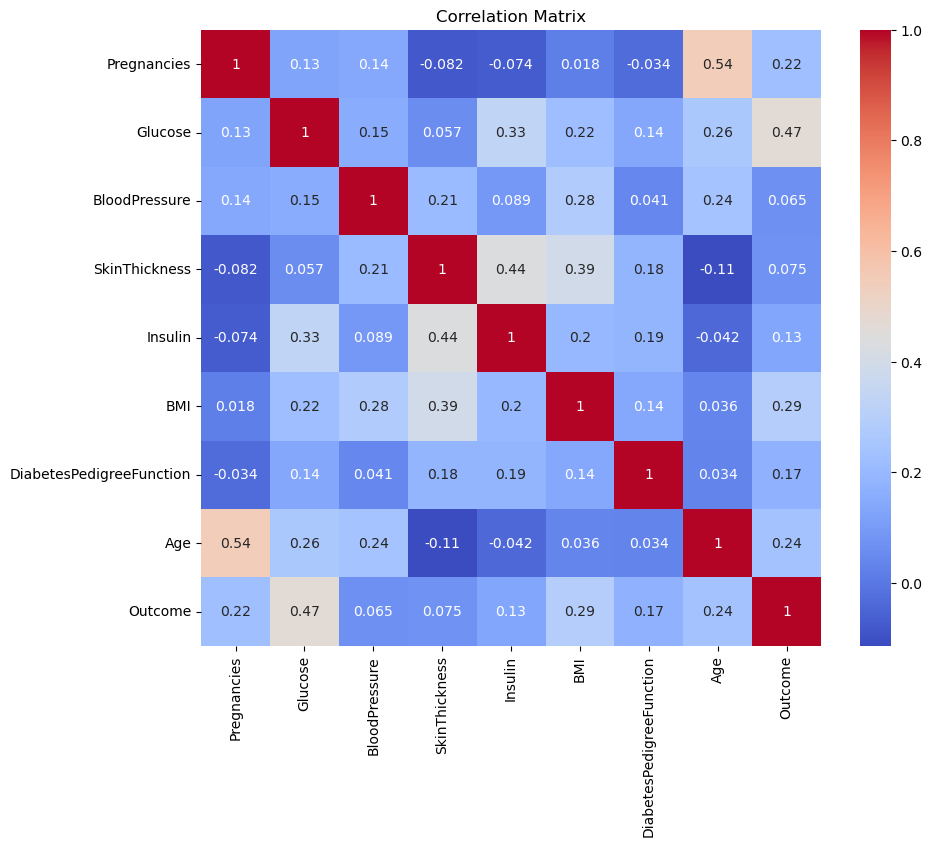

In [14]:
# Plot a histogram of each variable
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

# Create a correlation matrix heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

Answer:

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df.fillna(df.mean(), inplace=True)

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Answer:

In [19]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

Answer:

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [21]:
dt_classifier = DecisionTreeClassifier()

In [22]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


In [23]:
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [24]:
best_params = grid_search.best_params_
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=2)

In [25]:
y_pred = best_dt_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84        92
           1       0.62      0.36      0.46        36

    accuracy                           0.76       128
   macro avg       0.70      0.64      0.65       128
weighted avg       0.74      0.76      0.74       128



Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Answer:

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [27]:
y_pred = best_dt_classifier.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [29]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[84  8]
 [23 13]]


In [30]:
y_prob = best_dt_classifier.predict_proba(X_test)[:, 1]


In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

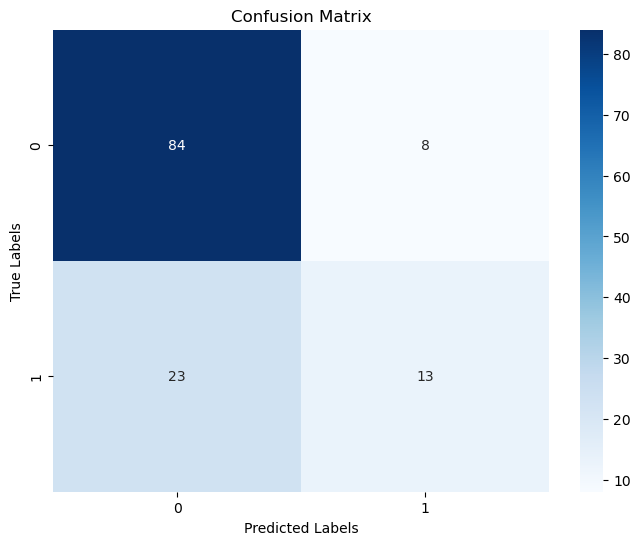

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

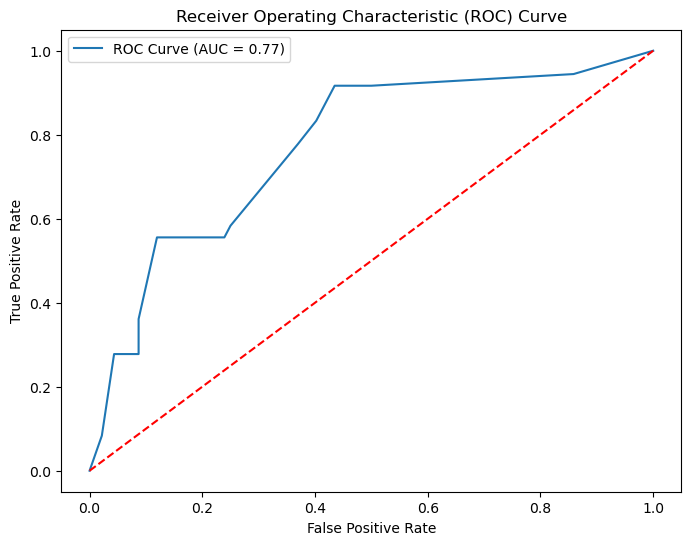

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [34]:
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))

Accuracy: 0.76
Precision: 0.62
Recall: 0.36
F1 Score: 0.46


Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Answer:

1. Visualize the decision tree:

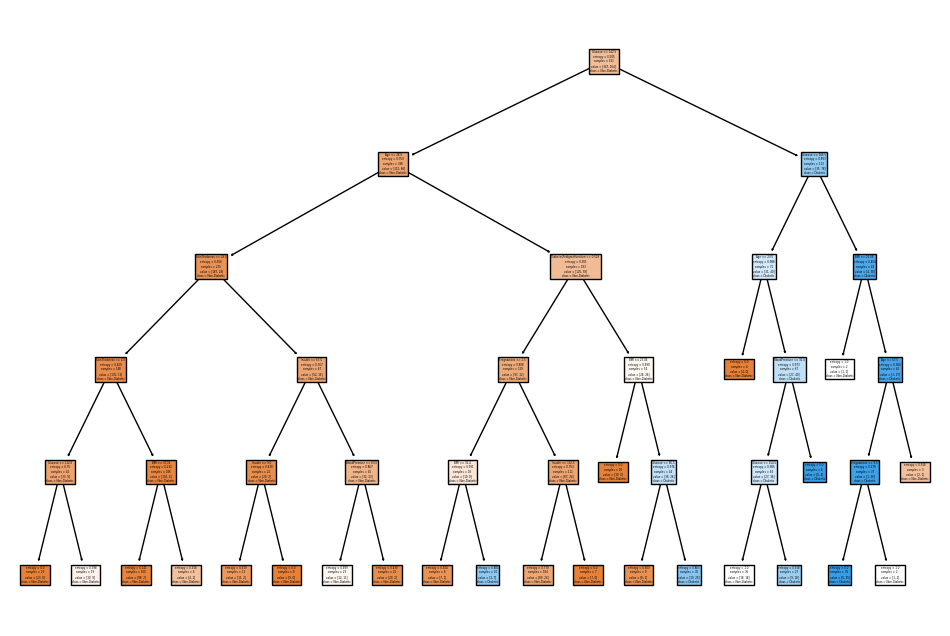

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(best_dt_classifier, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.show()

2. Examine the splits and branches:

Each node in the decision tree represents a split based on a specific variable and threshold.
The decision tree starts from the root node and branches out based on the conditions.
At each node, the tree makes a decision based on the variable and threshold, moving down to the left or right child node.

3. Identify the most important variables:

The importance of variables can be determined based on their placement in the decision tree and their impact on the splits.
Variables closer to the root node and higher up in the tree hierarchy tend to have more influence on the final decision.
By examining the tree structure, you can identify the variables that appear more frequently in the splits.

4. Determine the thresholds:

The thresholds in the decision tree represent the values at which the variable splits occur.
Thresholds can be interpreted based on domain knowledge and common sense.
For numerical variables, the splits can be based on ranges, such as "Glucose <= 120" or "BMI > 30".
For categorical variables (if present), the splits will be based on the categories themselves.

5. Explain the patterns and trends:

Analyze the splits and branches to identify patterns and trends in the decision tree.
Look for common characteristics or combinations of variables that lead to a particular outcome (diabetic or non-diabetic).
Consider how the decision tree aligns with domain knowledge and common sense to explain the learned patterns.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks

In [36]:
import pandas as pd

# Placeholder variables for validation and testing
new_data = pd.DataFrame({
    'Pregnancies': [5, 1, 10],
    'Glucose': [100, 150, 200],
    'BloodPressure': [70, 80, 90],
    'SkinThickness': [30, 25, 35],
    'Insulin': [80, 120, 150],
    'BMI': [25.0, 30.0, 35.0],
    'DiabetesPedigreeFunction': [0.5, 0.8, 1.2],
    'Age': [30, 40, 50]
})

new_test_data = pd.DataFrame({
    'Pregnancies': [2, 4, 6],
    'Glucose': [120, 140, 160],
    'BloodPressure': [70, 80, 90],
    'SkinThickness': [25, 30, 35],
    'Insulin': [80, 120, 150],
    'BMI': [25.0, 30.0, 35.0],
    'DiabetesPedigreeFunction': [0.5, 0.8, 1.2],
    'Age': [30, 40, 50]
})

new_test_labels = pd.Series([0, 1, 1])

# Placeholder variables for sensitivity analysis
sensitivity_data = pd.DataFrame({
    'Pregnancies': [1, 2, 3],
    'Glucose': [120, 130, 140],
    'BloodPressure': [70, 80, 90],
    'SkinThickness': [25, 30, 35],
    'Insulin': [80, 120, 150],
    'BMI': [25.0, 30.0, 35.0],
    'DiabetesPedigreeFunction': [0.5, 0.8, 1.2],
    'Age': [30, 40, 50]
})

# Placeholder variables for scenario testing
scenario_data = pd.DataFrame({
    'Pregnancies': [0, 0, 0],
    'Glucose': [120, 130, 140],
    'BloodPressure': [70, 80, 90],
    'SkinThickness': [25, 30, 35],
    'Insulin': [0, 0, 0],
    'BMI': [25.0, 30.0, 35.0],
    'DiabetesPedigreeFunction': [0.5, 0.8, 1.2],
    'Age': [30, 40, 50]
})